## Import modules

In [1]:
import cv2
import numpy as np
from imutils import paths
import argparse

from skimage import data
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.filters.rank import gradient

from sklearn.metrics import mean_squared_error
import math
import argparse

import matplotlib.pyplot as plt
%matplotlib inline

## Read image

In [2]:
image_path = 'testowy2.jpg'

## **Laplacian 2D**

**Laplacian Operator is a derivative operator which is used to find edges in an image. It is a second order derivative mask. In first case 2D mask is used. Measure is calculated by computing the variance of image after using Laplacian filter.** 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


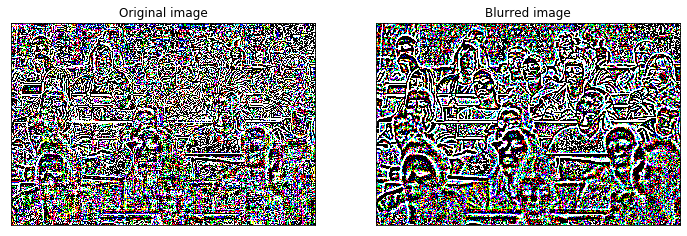

The result for original image is 351.85
The result for blurred image is 47.04


In [3]:
image = cv2.imread(image_path)


fm = cv2.Laplacian(image, cv2.CV_64F)
score = fm.var() #the result is a measure of the edge in the image

blurred = cv2.GaussianBlur(image, (5, 5), 0) 
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
fm2 = cv2.Laplacian(blurred, cv2.CV_64F)
score2 = fm2.var()

# Let's visualize both images

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(fm, cmap='gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(fm2, cmap='gray')
plt.title('Blurred image'), plt.xticks([]), plt.yticks([])
plt.show()

print(f'The result for original image is {round(score,2)}\nThe result for blurred image is {round(score2,2)}')

## **Laplacian 1D**

**Second approach requires the use of two laplacian 1d masks - one of them detects horizontal edges, other detects vertical edges.**

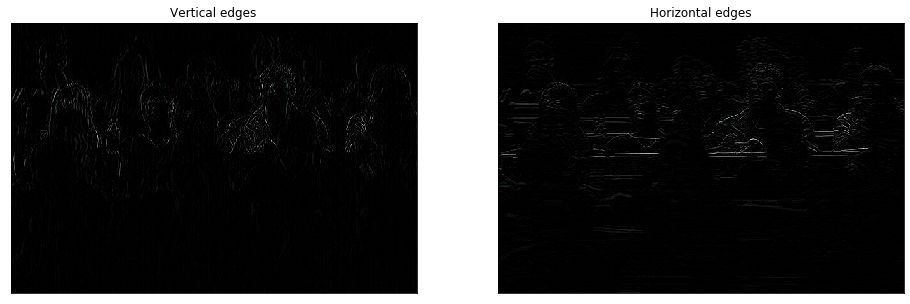

Result for original image is 5.06
Result for blurred image is 2.18.


In [4]:
kernel = np.array([[-1, 2, -1]])

# original image
laplacian_vertical = np.abs(cv2.filter2D(image, -1, kernel))
laplacian_horizontal = np.abs(cv2.filter2D(image, -1, kernel.T))
score = np.mean(laplacian_vertical + laplacian_horizontal)

# blurred image

laplacian_vertical_blurred = np.abs(cv2.filter2D(blurred, -1, kernel))
laplacian_horizontal_blurred = np.abs(cv2.filter2D(blurred, -1, kernel.T))
score2 = np.mean(laplacian_vertical_blurred + laplacian_horizontal_blurred)

plt.figure(figsize=(16,13))
plt.subplot(1,2,1)
plt.imshow(laplacian_vertical)
plt.title('Vertical edges'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(laplacian_horizontal)
plt.title('Horizontal edges'), plt.xticks([]), plt.yticks([])
plt.show()
wynik = np.mean(laplacian_vertical + laplacian_horizontal)


print(f'Result for original image is {round(score,2)}\nResult for blurred image is {round(score2,2)}.')

## **Sobel operator**

**Sobel filter, is used in image processing and computer vision, particularly within edge detection algorithms where it creates an image emphasising edges. It is a first order derivative mask. Like Laplacian 1D, there are two masks to detects horizontal and vertical edges.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


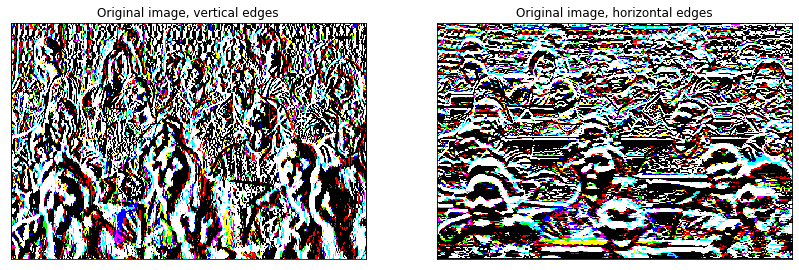

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


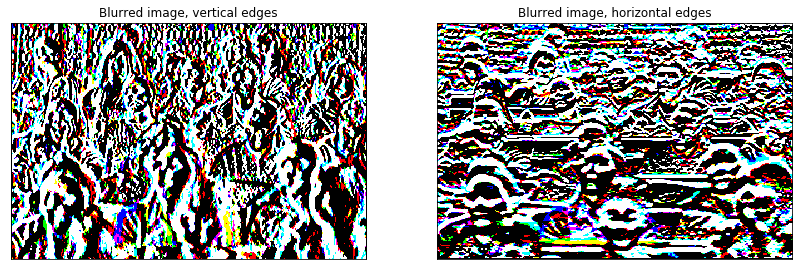

Result for original image is 331.53
Result for blurred image is 181.42.


In [5]:
gaussian_vertical = cv2.Sobel(image, cv2.CV_64F, 1, 0)
gaussian_horizontal = cv2.Sobel(image, cv2.CV_64F, 0, 1)
score = np.mean(gaussian_vertical * gaussian_horizontal)

gaussian_vertical_blurred = cv2.Sobel(blurred, cv2.CV_64F, 1, 0)
gaussian_horizontal_blurred = cv2.Sobel(blurred, cv2.CV_64F, 0, 1)
score2 = np.mean(gaussian_vertical_blurred * gaussian_horizontal_blurred)

plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
plt.imshow(gaussian_vertical)
plt.title('Original image, vertical edges'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(gaussian_horizontal)
plt.title('Original image, horizontal edges'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
plt.imshow(gaussian_vertical_blurred)
plt.title('Blurred image, vertical edges'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(gaussian_horizontal_blurred)
plt.title('Blurred image, horizontal edges'), plt.xticks([]), plt.yticks([])
plt.show()

print(f'Result for original image is {round(score,2)}\nResult for blurred image is {round(score2,2)}.')

## **Fourier transform**

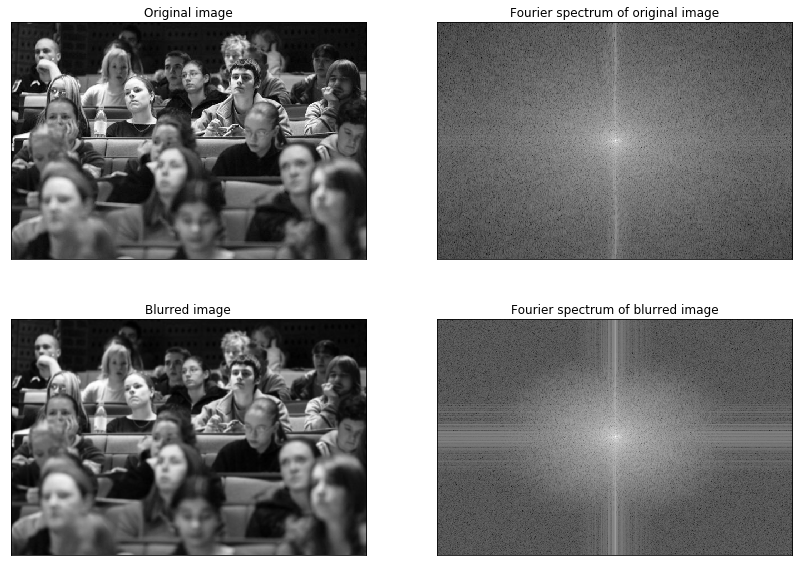

Result for original image is 7.57
Result for blurred image is 6.1.


In [6]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

gray_blurred = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
f2 = np.fft.fft2(gray_blurred)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = np.log(np.abs(fshift2))


plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.imshow(gray, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Fourier spectrum of original image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(gray_blurred, cmap = 'gray')
plt.title('Blurred image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Fourier spectrum of blurred image'), plt.xticks([]), plt.yticks([])
plt.show()

score_four = np.mean(magnitude_spectrum.flatten())
score_four_bl = np.mean(magnitude_spectrum2.flatten())
print(f'Result for original image is {round(score_four,2)}\nResult for blurred image is {round(score_four_bl,2)}.')

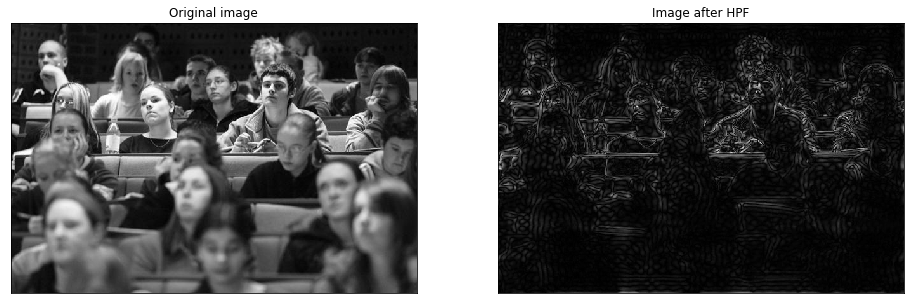

The result for original image is 11.6.


In [7]:
rows, cols = gray.shape
crow,ccol = rows/2 , cols/2
fshift[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(16,23))
plt.subplot(1,2,1)
plt.imshow(gray, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()

score = np.mean(img_back.flatten())
print(f'The result for original image is {round(score,2)}.')

## **Finding sharp parts of an image with LBP**

In [8]:
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return(out)

def s(x):
    temp = x>0
    return(temp.astype(float))


def lbpCode(im_gray, threshold):
    width, height = im_gray.shape
    interpOff = math.sqrt(2)/2
    I = im2double(im_gray)
    pt = cv2.copyMakeBorder(I,1,1,1,1,cv2.BORDER_REPLICATE)
    right = pt[1:-1, 2:]
    left = pt[1:-1, :-2]
    above = pt[:-2, 1:-1]
    below = pt[2:, 1:-1];
    aboveRight = pt[:-2, 2:]
    aboveLeft = pt[:-2, :-2]
    belowRight = pt[2:, 2:]
    belowLeft = pt[2:, :-2]
    interp0 = right
    interp1 = (1-interpOff)*((1-interpOff) * I + interpOff * right) + interpOff *((1-interpOff) * above + interpOff * aboveRight)

    interp2 = above;
    interp3 = (1-interpOff)*((1-interpOff) * I + interpOff * left ) + interpOff *((1-interpOff) * above + interpOff * aboveLeft)

    interp4 = left;
    interp5 = (1-interpOff)*((1-interpOff) * I + interpOff * left ) + interpOff *((1-interpOff) * below + interpOff * belowLeft)

    interp6 = below;
    interp7 = (1-interpOff)*((1-interpOff) * I + interpOff * right ) + interpOff *((1-interpOff) * below + interpOff * belowRight) 

    s0 = s(interp0 - I-threshold)
    s1 = s(interp1 - I-threshold)
    s2 = s(interp2 - I-threshold)
    s3 = s(interp3 - I-threshold)
    s4 = s(interp4 - I-threshold)
    s5 = s(interp5 - I-threshold)
    s6 = s(interp6 - I-threshold)
    s7 = s(interp7 - I-threshold)
    LBP81 = s0 * 1 + s1 * 2+s2 * 4   + s3 * 8+ s4 * 16  + s5 * 32  + s6 * 64  + s7 * 128
    LBP81.astype(int)

    U = np.abs(s0 - s7) + np.abs(s1 - s0) + np.abs(s2 - s1) + np.abs(s3 - s2) + np.abs(s4 - s3) + np.abs(s5 - s4) + np.abs(s6 - s5) + np.abs(s7 - s6)
    LBP81riu2 = s0 + s1 + s2 + s3 + s4 + s5 + s6 + s7
    LBP81riu2[U > 2] = 9;
    return(LBP81riu2)




def lbpSharpness(im_gray, s, threshold):
    lbpmap  = lbpCode(im_gray, threshold)
    window_r = (s-1)//2;

    h, w = im_gray.shape[:2]
    map_im =  np.zeros((h, w), dtype=float)
    lbpmap_pad = cv2.copyMakeBorder(lbpmap, window_r, window_r, window_r, window_r, cv2.BORDER_REPLICATE)

    lbpmap_sum = (lbpmap_pad==6).astype(float) + (lbpmap_pad==7).astype(float) + (lbpmap_pad==8).astype(float) + (lbpmap_pad==9).astype(float)

    integral = cv2.integral(lbpmap_sum);
    
    integral = integral.astype(float)

    map_im = (integral[s-1:-1, s-1:-1]-integral[0:h, s-1:-1]-integral[s-1:-1, 0:w]+integral[0:h, 0:w])/math.pow(s,2);

    return(map_im)

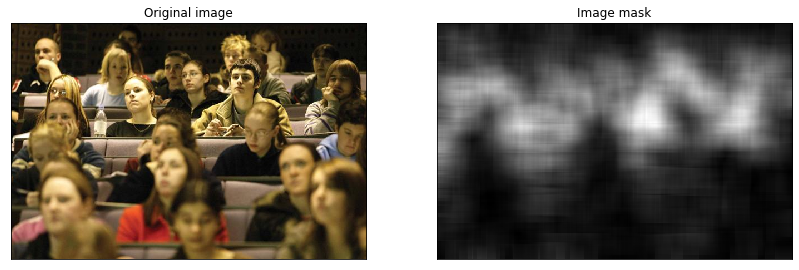

In [9]:
# read image and convert from BGR to RBG

img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


sharpness_map = lbpSharpness(img_gray, 51, 0.005)
sharpness_map = (sharpness_map - np.min(sharpness_map))/(np.max(sharpness_map - np.min(sharpness_map)))

# making 8-bit 3-channel image for open cv module
sharpness_map = (sharpness_map*255).astype('uint8')
maska = np.stack((sharpness_map,)*3, -1)
concat = np.concatenate((img,maska ), axis=1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #opencv see image in BGR

plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(maska)
plt.title('Image mask'), plt.xticks([]), plt.yticks([])
plt.show()

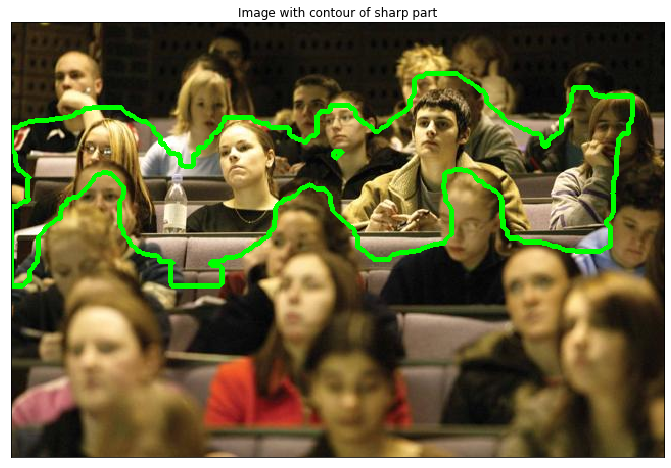

In [10]:
# morphological operations to make a mask
kernel2 = np.ones((17,17),np.uint8)
ret, thresh = cv2.threshold(maska, 100, 255, cv2.THRESH_BINARY)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel2)

# make contour of mask
contours, hierarchy = cv2.findContours(thresh[:,:,0], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0), 3)

# visualize image
plt.figure(figsize=(12,8))
plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.title('Image with contour of sharp part')
plt.show()